In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("titanic.csv")
df.shape

(891, 12)

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df.isna().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [6]:
df.drop(['Cabin'],axis=1, inplace=True)
df.isna().sum().sort_values(ascending=False)

Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [7]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [8]:
df.Embarked.mode()

0    S
Name: Embarked, dtype: object

In [9]:
df.Embarked.fillna(df.Embarked.mode()[0], inplace=True)
df.isna().sum().sort_values(ascending=False)

Age            177
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [10]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

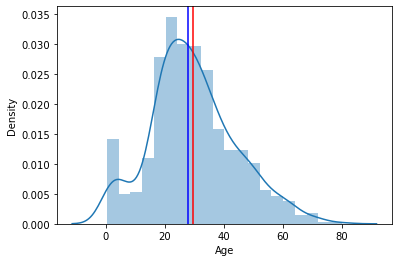

In [11]:
sns.distplot(df.Age)
plt.axvline(df.Age.mean(), color='r')
plt.axvline(df.Age.median(), color='b')
plt.show()

In [12]:
df.Age.mean()

29.69911764705882

In [13]:
df.Age.fillna(df.Age.mean(), inplace=True)
df.isna().sum().sort_values(ascending=False)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [14]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [15]:
df.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [16]:
df.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [17]:
df['Family_Size']= df.SibSp + df.Parch + 1

In [18]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_Size
798,799,0,3,"Ibrahim Shawah, Mr. Yousseff",male,30.000000,0,0,2685,7.2292,C,1
451,452,0,3,"Hagland, Mr. Ingvald Olai Olsen",male,29.699118,1,0,65303,19.9667,S,2
796,797,1,1,"Leader, Dr. Alice (Farnham)",female,49.000000,0,0,17465,25.9292,S,1
389,390,1,2,"Lehmann, Miss. Bertha",female,17.000000,0,0,SC 1748,12.0000,C,1
795,796,0,2,"Otter, Mr. Richard",male,39.000000,0,0,28213,13.0000,S,1


In [19]:
df['Gender_Class']= df.apply(lambda x : 'child' if x['Age']<15 else x['Sex'], axis = 1 )
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_Size,Gender_Class
576,577,1,2,"Garside, Miss. Ethel",female,34.000000,0,0,243880,13.0000,S,1,female
398,399,0,2,"Pain, Dr. Alfred",male,23.000000,0,0,244278,10.5000,S,1,male
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.000000,1,0,2651,11.2417,C,2,child
669,670,1,1,"Taylor, Mrs. Elmer Zebley (Juliet Cummins Wright)",female,29.699118,1,0,19996,52.0000,S,2,female
452,453,0,1,"Foreman, Mr. Benjamin Laventall",male,30.000000,0,0,113051,27.7500,C,1,male


In [20]:
df.shape

(891, 13)

In [21]:
df= pd.get_dummies(df, columns=['Gender_Class','Embarked'], drop_first=True)
df.shape

(891, 15)

In [22]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Family_Size,Gender_Class_female,Gender_Class_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,2,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,2,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,1,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,2,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,1,0,1,0,1


In [23]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family_Size,Gender_Class_female,Gender_Class_male,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.904602,0.308642,0.603816,0.086420,0.725028
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,1.613459,0.462192,0.489378,0.281141,0.446751
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,1.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000,0.000000,1.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,2.000000,1.000000,1.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,11.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Family_Size', 'Gender_Class_female',
       'Gender_Class_male', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [25]:
df.drop(['PassengerId', 'Name','Sex','SibSp','Parch','Ticket'], axis=1, inplace=True)

In [26]:
df.columns

Index(['Survived', 'Pclass', 'Age', 'Fare', 'Family_Size',
       'Gender_Class_female', 'Gender_Class_male', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [27]:
df.sample(5)

,Survived,Pclass,Age,Fare,Family_Size,Gender_Class_female,Gender_Class_male,Embarked_Q,Embarked_S
679,1,1,36.000000,512.3292,2,0,1,0,0
195,1,1,58.000000,146.5208,1,1,0,0,0
396,0,3,31.000000,7.8542,1,1,0,0,1
707,1,1,42.000000,26.2875,1,0,1,0,1
201,0,3,29.699118,69.5500,11,0,1,0,1


In [31]:
X = df.loc[: , df.columns!='Survived']
X.sample(5)

,Pclass,Age,Fare,Family_Size,Gender_Class_female,Gender_Class_male,Embarked_Q,Embarked_S
683,3,14.000000,46.9000,8,0,0,0,1
67,3,19.000000,8.1583,1,0,1,0,1
47,3,29.699118,7.7500,1,1,0,1,0
552,3,29.699118,7.8292,1,0,1,1,0
331,1,45.500000,28.5000,1,0,1,0,1


In [29]:
y=df.Survived

In [30]:
y.sample(5)

783    0
179    0
249    0
80     0
574    0
Name: Survived, dtype: int64

In [32]:
X.shape

(891, 8)

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=1)
print(X_train.shape,'   ||   ',X_test.shape)
print(y_train.shape,'   ||   ',y_test.shape)

(712, 8)    ||    (179, 8)
(712,)    ||    (179,)


## Decision Tree Classifier

In [34]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [35]:
model

DecisionTreeClassifier(random_state=0)

### Prediction

y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)

### Model Evaluation 

In [38]:
from sklearn.metrics import accuracy_score
print('Training Accuracy:', accuracy_score(y_train,y_pred_train))
print('Testing Accuracy:', accuracy_score(y_test,y_pred_test))

Training Accuracy: 0.9873595505617978
Testing Accuracy: 0.7821229050279329


>As we can see that Training Accuracy is much higher than the Test Accuracy , meaning our model has gone to OVERFITTING Zone

In [39]:
from sklearn.metrics import confusion_matrix
print('Training Confusion Metrics:\n', confusion_matrix(y_train,y_pred_train))
print('Testing Confusion Metrics:\n', confusion_matrix(y_test,y_pred_test))

Training Confusion Metrics:
 [[442   1]
 [  8 261]]
Testing Confusion Metrics:
 [[91 15]
 [24 49]]


In [40]:
from sklearn.metrics import precision_score
print('Training Precision Score:', precision_score(y_train,y_pred_train))
print('Testing Precision Score:', precision_score(y_test,y_pred_test))

Training Precision Score: 0.9961832061068703
Testing Precision Score: 0.765625


## Decision Tree Classifier Model 2 

In [54]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(random_state=0, criterion='entropy')
model2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [55]:
model2

DecisionTreeClassifier(criterion='entropy', random_state=0)

### Prediction 

In [56]:
y_pred_train2=model2.predict(X_train)
y_pred_test2=model2.predict(X_test)

### Model Evaluation 

In [57]:
from sklearn.metrics import accuracy_score
print('Training Accuracy:', accuracy_score(y_train,y_pred_train2))
print('Testing Accuracy:', accuracy_score(y_test,y_pred_test2))

Training Accuracy: 0.9873595505617978
Testing Accuracy: 0.7653631284916201


## Decision Tree Classifier Model 3

In [46]:
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier(random_state=0, criterion='gini', max_depth=3)
model3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

### Prediction

In [51]:
y_pred_train3=model3.predict(X_train)
y_pred_test3=model3.predict(X_test)

### Model Evaluation 

In [58]:
from sklearn.metrics import accuracy_score
print('Training Accuracy:', accuracy_score(y_train,y_pred_train3))
print('Testing Accuracy:', accuracy_score(y_test,y_pred_test3))

Training Accuracy: 0.8384831460674157
Testing Accuracy: 0.8044692737430168


# GridSearchCV 

In [63]:
parameter_list = {
    'criterion' : ['gini','entropy'],
    'max_depth' : [1,2,3,4,5,6,7,8,9,None]
}
parameter_list

{'criterion': ['gini', 'entropy'],
 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, None]}

In [64]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(model, param_grid=parameter_list, cv=10, n_jobs=-1)

In [65]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, None]})

#### To check which is the best parameter

In [66]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 3}

In [67]:
grid.best_score_

0.8358176838810643

In [68]:
y_pred_train=grid.predict(X_train)
y_pred_test=grid.predict(X_test)

In [69]:
from sklearn.metrics import accuracy_score
print('Training Accuracy:', accuracy_score(y_train,y_pred_train))
print('Testing Accuracy:', accuracy_score(y_test,y_pred_test))

Training Accuracy: 0.8384831460674157
Testing Accuracy: 0.8044692737430168


# GridSearchCV - Second Time

In [70]:
parameter_list2 = {
    'criterion' : ['gini','entropy'],
    'max_depth' : range(2,60),
    'max_features' : ['sqrt', 'log2', None]
}
parameter_list2

{'criterion': ['gini', 'entropy'],
 'max_depth': range(2, 60),
 'max_features': ['sqrt', 'log2', None]}

In [71]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(model, param_grid=parameter_list2, cv=10, n_jobs=-1)

In [72]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 60),
                         'max_features': ['sqrt', 'log2', None]})

In [73]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 3, 'max_features': None}

In [74]:
grid.best_score_

0.8358176838810643

# Random Forest

In [75]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [76]:
y_pred_train=clf.predict(X_train)
y_pred_test=clf.predict(X_test)

In [77]:
from sklearn.metrics import accuracy_score
print('Training Accuracy:', accuracy_score(y_train,y_pred_train))
print('Testing Accuracy:', accuracy_score(y_test,y_pred_test))

Training Accuracy: 0.9873595505617978
Testing Accuracy: 0.7653631284916201


### GridSearchCV

In [79]:
param_dist = {
    'criterion' : ['gini','entropy'],
    'max_depth' : range(2,99),
    'max_features' : ['sqrt', 'log2', None]
}
param_dist

{'criterion': ['gini', 'entropy'],
 'max_depth': range(2, 99),
 'max_features': ['sqrt', 'log2', None]}

In [82]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(clf, param_grid=param_dist, cv=10, n_jobs=-1)

In [83]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 99),
                         'max_features': ['sqrt', 'log2', None]})

In [84]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt'}

In [85]:
grid.best_score_

0.8469874804381847

In [86]:
y_pred_train=grid.predict(X_train)
y_pred_test=grid.predict(X_test)

In [87]:
from sklearn.metrics import accuracy_score
print('Training Accuracy:', accuracy_score(y_train,y_pred_train))
print('Testing Accuracy:', accuracy_score(y_test,y_pred_test))

Training Accuracy: 0.8806179775280899
Testing Accuracy: 0.7877094972067039
